# Gradient descent for multiple linear regression

In [11]:
import numpy as np
import math,copy
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(legacy='1.25')

In [12]:
Xt = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
yt = np.array([460, 232, 178])
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

print(Xt.shape)
print(Xt)
l=len(np.transpose(Xt))
print(l)
f_wb=[]
for j in range(l-1):
        print(j)
        x=Xt[j,:]
        print(x)
        f_wbi=np.dot(w_init,x)+b_init 
        if j<5:
         f_wb.append(round(f_wbi,2))
         print(f_wb)

      

(3, 4)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
4
0
[2104    5    1   45]
[460.0]
1
[1416    3    2   40]
[460.0, 232.0]
2
[852   2   1  35]
[460.0, 232.0, 178.0]


Compute cost function J(w,b)

In [ ]:
def compute_repmodel(Xt,yt,w,b):
    
    l=Xt.shape[1]#column size
    m=Xt.shape[0]#row size
    print(l,m)

    f_wb=[]
    for j in range(m):
        x=Xt[j,:]#first row --> j=1
        f_wbi=np.dot(w,x)+b 
        if j<5:
         f_wb.append(round(f_wbi,2))
         #print(f_wb)
    return f_wb   

f_wb=compute_repmodel(Xt,yt,w_init,b_init)
print(f"Cost function relative to each feature is {f_wb}")

4 3
Cost function relative to each feature is [460.0, 232.0, 178.0]


In [14]:
def compute_costf(Xt,yt,w,b):
    l=len(np.transpose(Xt))
    m=Xt.shape[0]
    f_wb=[]
    for j in range(m):
        x=Xt[j,:]
        f_wbj=np.dot(w,x)+b 
        if j<5:
         f_wb.append(f_wbj)
         #f_wb.append(round(f_wbj,2))
         #print(f_wb)
    m=len(f_wb)
    Jwbi=0  
    for i in range(m):
       Jwbi=  Jwbi+(f_wb[i]-yt[i])**2
       #print(f_wb[i])
       #print(yt[i])
    Jwb=Jwbi/(2*m)   
    return f_wb,Jwb   

In [15]:
[f_wb,Jwb]=compute_costf(Xt,yt,w_init,b_init)
fwb=[]
for i in range(len(f_wb)):
     fwbi=round(f_wb[i],2)
     if j<5:  
      fwb.append(fwbi)
print(f"Prediction relative to each feature is {fwb}")
print(f"Final Cost function is {Jwb:.2f}")

Prediction relative to each feature is [460.0, 232.0, 178.0]
Final Cost function is 0.00


Gradient with multiple variables

In [16]:
def compute_gradf(Xt,yt,w,b,a,it):
    l=Xt.shape[1]
    m=Xt.shape[0]
    f_wb=[]
    J_wb=[]
    wb=[]
    for i in range(it):
        dwi=0
        dbi=0
        for j in range(m):
            x=Xt[j,:]
            f_wbj=np.dot(w,x)+b 
            dbi=dbi+(f_wbj-yt[j])
            dwi=dwi+((f_wbj-yt[j])*x)
        dw=dwi/m 
        db=dbi/m 

        w=w-(a*dw)
        b=b-(a*db)
        [fwb,Jwb]=compute_costf(Xt,yt,w,b) 
        if i<100000:
            f_wb.append(fwb)
            J_wb.append(Jwb)
            wb.append([w,b])

        if i% math.ceil(it/10)==0:
         print(f"Iteration {i:4}: Cost {J_wb[-1]:.3f} ",
                  f"dw: {dw}, db: {db:.2f}  ",
                  f"w: {w}, b:{b:.2f}")  

    return fwb,J_wb,wb,w,b 

In [17]:
w_init= np.zeros_like(w_init)
b_init = 0.
alpha=5.0e-7
it=1000
[fwb,J_wb,wb,w,b]=compute_gradf(Xt,yt,w_init,b_init,alpha,it)
print(f"w:{w},b:{b:.3f},Cost function:{J_wb[-1]:.3f}")

m,_ = Xt.shape
for i in range(m):
    print(f"prediction: {np.dot(Xt[i], w) + b:0.2f}, target value: {yt[i]}")
print(f"Cost function: {J_wb[-1]:.3f}")      

Iteration    0: Cost 2529.463  dw: [-4.83e+05 -1.12e+03 -3.67e+02 -1.21e+04], db: -290.00   w: [2.41e-01 5.59e-04 1.84e-04 6.03e-03], b:0.00
Iteration  100: Cost 695.990  dw: [ -3.66  -6.59  22.96 144.5 ], db: 4.81   w: [ 0.2  0.  -0.  -0. ], b:-0.00
Iteration  200: Cost 694.921  dw: [ -3.65  -6.58  22.92 143.86], db: 4.78   w: [ 0.2   0.   -0.   -0.01], b:-0.00
Iteration  300: Cost 693.860  dw: [ -3.63  -6.58  22.89 143.22], db: 4.76   w: [ 0.2   0.   -0.   -0.02], b:-0.00
Iteration  400: Cost 692.809  dw: [ -3.61  -6.57  22.86 142.58], db: 4.74   w: [ 0.2   0.   -0.   -0.02], b:-0.00
Iteration  500: Cost 691.768  dw: [ -3.6   -6.57  22.82 141.94], db: 4.72   w: [ 0.2   0.   -0.01 -0.03], b:-0.00
Iteration  600: Cost 690.735  dw: [ -3.58  -6.56  22.79 141.31], db: 4.69   w: [ 0.2   0.   -0.01 -0.04], b:-0.00
Iteration  700: Cost 689.711  dw: [ -3.57  -6.56  22.76 140.68], db: 4.67   w: [ 0.2   0.   -0.01 -0.04], b:-0.00
Iteration  800: Cost 688.696  dw: [ -3.55  -6.55  22.73 140.05], 

Plot of cost vs iterations

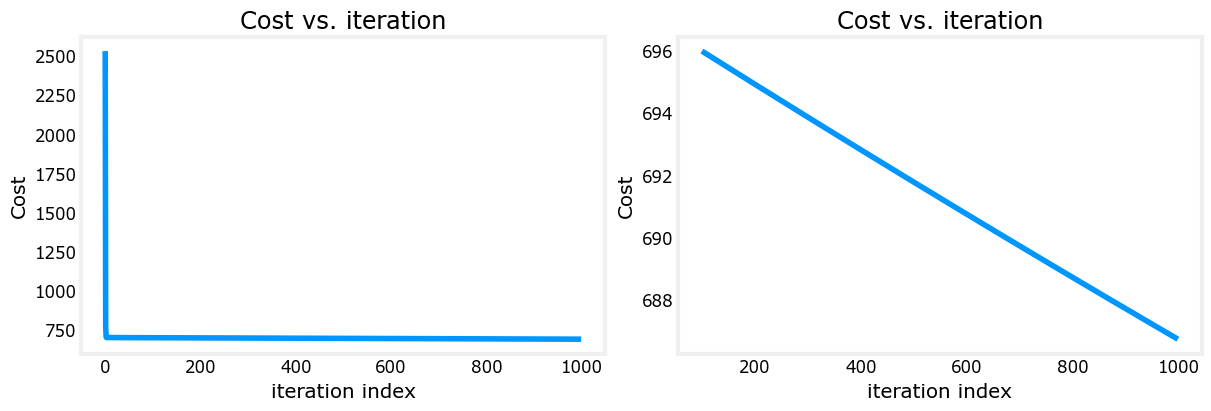

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_wb)
ax2.plot(100 + np.arange(len(J_wb[100:])), J_wb[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration index')   ;  ax2.set_xlabel('iteration index') 
plt.show()

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.14741e+04  4.8e-01  1.1e-03  3.6e-04  1.2e-02  2.9e-04 -4.8e+05 -1.1e+03 -3.7e+02 -1.2e+04 -2.9e+02
        1 1.69487e+05 -1.7e-01 -3.9e-04 -1.9e-04 -4.7e-03 -1.2e-04  6.6e+05  1.5e+03  5.6e+02  1.7e+04  4.1e+02
        2 3.14543e+05  7.1e-01  1.7e-03  5.1e-04  1.8e-02  4.2e-04 -9.0e+05 -2.1e+03 -7.0e+02 -2.3e+04 -5.4e+02
        3 5.84258e+05 -5.0e-01 -1.1e-03 -4.9e-04 -1.3e-02 -3.2e-04  1.2e+06  2.8e+03  1.0e+03  3.1e+04  7.5e+02
        4 1.08576e+06  1.2e+00  2.7e-03  8.2e-04  2.9e-02  6.8e-04 -1.7e+06 -3.8e+03 -1.3e+03 -4.2e+04 -1.0e+03
        5 2.01826e+06 -1.1e+00 -2.5e-03 -1.0e-03 -2.9e-02 -7.0e-04  2.3e+06  5.2e+03  1.9e+03  5.8e+04  1.4e+03
        6 3.75212e+06  2.0e+00  4.6e-03  1.4e-03  4.9e-02  1.2e-03 -3.1e+06 -7.1e+03 -2.5e+03 -7.8e+04 -

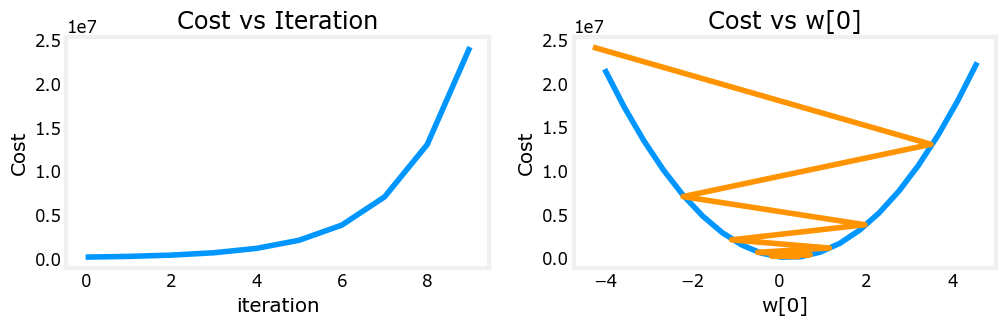

In [19]:
_, _, hist = run_gradient_descent(Xt, yt, 10, alpha = 9.9e-7)
plot_cost_i_w(Xt, yt, hist)